In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
EPL=pd.read_excel("C:/Users/trent/OneDrive/Documents/Repositories/Team-Salary-Vs-Performance-Regression/data/EPL pay and performance.xlsx")

In [3]:
EPL.describe()

,Season_ending,promoted_last_season,Position,Revenues,salaries
count,380.000000,380.000000,380.000000,3.750000e+02,3.750000e+02
mean,2006.000000,0.150000,10.500000,8.431025e+07,5.183637e+07
std,5.484447,0.357542,5.773884,7.533617e+07,4.331005e+07
min,1997.000000,0.000000,1.000000,9.238238e+06,4.172024e+06
25%,2001.000000,0.000000,5.750000,3.895834e+07,2.413900e+07
50%,2006.000000,0.000000,10.500000,5.907200e+07,3.774400e+07
75%,2011.000000,0.000000,15.250000,9.753050e+07,6.300007e+07
max,2015.000000,1.000000,20.000000,4.331640e+08,2.331060e+08


In [4]:
EPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season_ending         380 non-null    int64  
 1   Club                  380 non-null    object 
 2   promoted_last_season  380 non-null    int64  
 3   Position              380 non-null    int64  
 4   Revenues              375 non-null    float64
 5   salaries              375 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 17.9+ KB


In [5]:
Sumsal = EPL.groupby(['Season_ending'])['salaries'].sum().reset_index().rename(columns={'salaries':'allsal'})
Sumsal

,Season_ending,allsal
0,1997,2.195995e+08
1,1998,2.896696e+08
2,1999,3.900185e+08
3,2000,4.673185e+08
4,2001,5.622860e+08
5,2002,6.765034e+08
6,2003,7.477382e+08
7,2004,7.980298e+08
8,2005,7.836889e+08
9,2006,8.671860e+08


In [ ]:
# Get rid of scientific notation for salaries
pd.options.display.float_format = '{:.0f}'.format
Sumsal

,Season_ending,allsal
0,1997,219599462
1,1998,289669601
2,1999,390018517
3,2000,467318483
4,2001,562286010
5,2002,676503369
6,2003,747738215
7,2004,798029773
8,2005,783688898
9,2006,867186039


In [7]:
EPL = pd.merge(EPL, Sumsal, on=['Season_ending'], how='left')
display(EPL)

,Season_ending,Club,promoted_last_season,Position,Revenues,salaries,allsal
0,1997,Arsenal,0,3,27158007,15279000,219599462
1,1997,Aston Villa,0,5,22079000,10070000,219599462
2,1997,Blackburn Rovers,0,13,14302220,14336629,219599462
3,1997,Chelsea,0,6,23729000,14873000,219599462
4,1997,Coventry City,0,17,12264825,8396261,219599462
...,...,...,...,...,...,...,...
375,2015,Sunderland,0,16,101087000,77106000,2031348184
376,2015,Swansea City,0,8,103928360,82540562,2031348184
377,2015,Tottenham Hotspur,0,5,196377000,100832000,2031348184
378,2015,West Bromwich Albion,0,13,96269000,69801000,2031348184


In [8]:
EPL['relsal']= EPL['salaries']/EPL['allsal']

<Axes: xlabel='relsal', ylabel='Position'>

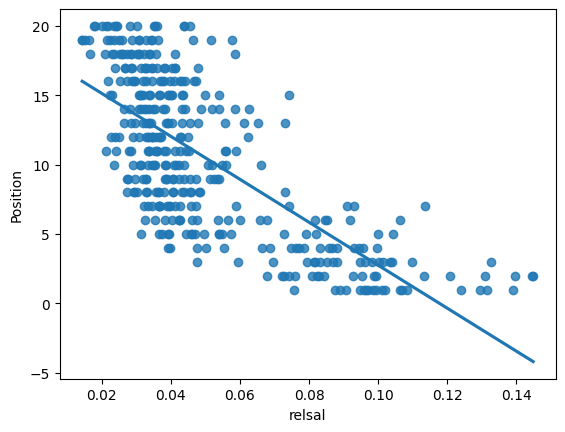

In [ ]:
# Lower position is better in the EPL
sns.regplot(x="relsal", y="Position", data = EPL, ci=False)

In [11]:
EPL['mpos'] = -EPL['Position'] 

<Axes: xlabel='relsal', ylabel='mpos'>

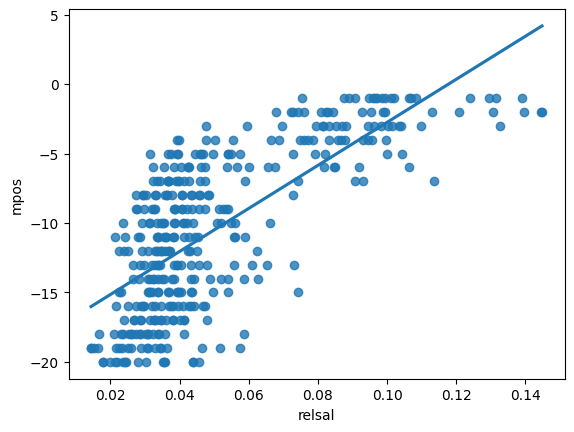

In [ ]:
# Now the sign is flipped so higher is better
sns.regplot(x="relsal", y="mpos", data = EPL, ci=False)

In [ ]:
# Change data to log format
EPL['lnpos']= -np.log(EPL['Position'])

<Axes: xlabel='relsal', ylabel='lnpos'>

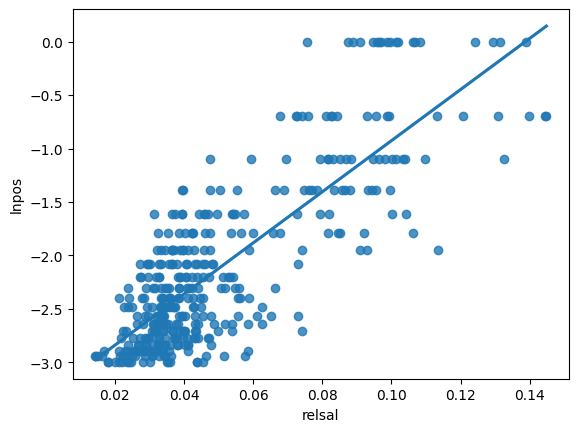

In [14]:
sns.regplot(x="relsal", y="lnpos", data = EPL, ci=False)

In [15]:
possal1_lm = smf.ols(formula = 'lnpos ~ relsal ', data=EPL).fit()
print(possal1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  lnpos   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     715.6
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           9.02e-89
Time:                        22:23:10   Log-Likelihood:                -243.89
No. Observations:                 375   AIC:                             491.8
Df Residuals:                     373   BIC:                             499.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3181      0.051    -64.725      0.0

Add variable to test omitted variable bias (OVB)

In [16]:
# Test if Promotion is skewing results
possal2_lm = smf.ols(formula = 'lnpos ~ relsal + promoted_last_season', data=EPL).fit()
print(possal2_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  lnpos   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     356.8
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           3.03e-87
Time:                        22:32:29   Log-Likelihood:                -243.89
No. Observations:                 375   AIC:                             493.8
Df Residuals:                     372   BIC:                             505.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.3185 

In [17]:
# Create a variable for last seasons position
EPL.sort_values(by=['Club','Season_ending'], ascending=True)
EPL

,Season_ending,Club,promoted_last_season,Position,Revenues,salaries,allsal,relsal,mpos,lnpos
0,1997,Arsenal,0,3,27158007,15279000,219599462,0,-3,-1
1,1997,Aston Villa,0,5,22079000,10070000,219599462,0,-5,-2
2,1997,Blackburn Rovers,0,13,14302220,14336629,219599462,0,-13,-3
3,1997,Chelsea,0,6,23729000,14873000,219599462,0,-6,-2
4,1997,Coventry City,0,17,12264825,8396261,219599462,0,-17,-3
...,...,...,...,...,...,...,...,...,...,...
375,2015,Sunderland,0,16,101087000,77106000,2031348184,0,-16,-3
376,2015,Swansea City,0,8,103928360,82540562,2031348184,0,-8,-2
377,2015,Tottenham Hotspur,0,5,196377000,100832000,2031348184,0,-5,-2
378,2015,West Bromwich Albion,0,13,96269000,69801000,2031348184,0,-13,-3


In [19]:
EPL['lnpos_lag'] = EPL.groupby('Club')['lnpos'].shift(1)
EPL

,Season_ending,Club,promoted_last_season,Position,Revenues,salaries,allsal,relsal,mpos,lnpos,lnpos_lag
0,1997,Arsenal,0,3,27158007,15279000,219599462,0,-3,-1,NaN
1,1997,Aston Villa,0,5,22079000,10070000,219599462,0,-5,-2,NaN
2,1997,Blackburn Rovers,0,13,14302220,14336629,219599462,0,-13,-3,NaN
3,1997,Chelsea,0,6,23729000,14873000,219599462,0,-6,-2,NaN
4,1997,Coventry City,0,17,12264825,8396261,219599462,0,-17,-3,NaN
5,1997,Derby County,1,12,10737571,6406557,219599462,0,-12,-2,NaN
6,1997,Everton,0,15,18881961,10933090,219599462,0,-15,-3,NaN
7,1997,Leeds United,0,11,22249000,12312000,219599462,0,-11,-2,NaN
8,1997,Leicester City,1,9,17320000,8914000,219599462,0,-9,-2,NaN
9,1997,Liverpool,0,4,39394000,14559000,219599462,0,-4,-1,NaN


In [ ]:
# Test if last seasons position is skewing results
possal3_lm = smf.ols(formula = 'lnpos ~lnpos_lag + relsal', data=EPL).fit()
print(possal3_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  lnpos   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     400.0
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           6.22e-89
Time:                        22:35:10   Log-Likelihood:                -192.18
No. Observations:                 333   AIC:                             390.4
Df Residuals:                     330   BIC:                             401.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0502      0.176    -11.633      0.0

In [21]:
# Add fixed effects for clubs
possal4_lm = smf.ols(formula = "lnpos ~ lnpos_lag + relsal +C(Club)", data=EPL).fit()
print(possal4_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  lnpos   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     20.86
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           8.34e-65
Time:                        22:36:54   Log-Likelihood:                -168.86
No. Observations:                 333   AIC:                             421.7
Df Residuals:                     291   BIC:                             581.7
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [22]:
# Arsenal was the team the regression was comparing against and they performed strongly in data set so every team looks worse in comparison. Try removing them.
Avpos = EPL.groupby(['Club'])['Position'].mean()
Avpos

Club
Arsenal                    3
Aston Villa               10
Barnsley                  19
Birmingham City           14
Blackburn Rovers          12
Blackpool                 19
Bolton Wanderers          13
Bradford City             18
Burnley                   18
Cardiff City              20
Charlton Athletic         13
Chelsea                    3
Coventry City             15
Crystal Palace            15
Derby County              14
Everton                   10
Fulham                    12
Hull City                 18
Ipswich Town              12
Leeds United               8
Leicester City            13
Liverpool                  4
Manchester City            8
Manchester United          2
Middlesbrough             13
Newcastle United          10
Norwich City              15
Nottingham Forest         20
Portsmouth                14
Queens Park Rangers       19
Reading                   15
Sheffield United          18
Sheffield Wednesday       14
Southampton               12
Stoke Cit

In [23]:
# Pick mid team Everton as the comparison team
possal5_lm = smf.ols(formula = "lnpos ~ lnpos_lag + relsal +C(Club, Treatment('Everton'))", data=EPL).fit()
print(possal5_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  lnpos   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     20.86
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           8.34e-65
Time:                        22:40:36   Log-Likelihood:                -168.86
No. Observations:                 333   AIC:                             421.7
Df Residuals:                     291   BIC:                             581.7
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [ ]:
# Calculates the expected position for a 2% (lowest), 8%(mid) and 14%(highest) in relative salary
print(np.exp(2.1- 11*.02))
print(np.exp(2.1- 11*.08))
print(np.exp(2.1- 11*.14))

6.553504862191149
3.387187733621335
1.7506725002961012
